__Dataset__

Breast Cancer Wisconsin (Diagnostic) Data Set from Kaggle (https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)
Features are computer from a digitized image of a fine needle aspirate (FNA) of a breast mass

Ten real-valued features are computerd for each cell nucleus:
1. radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) 
2. perimeter 
3. area 
4. smoothness (local variation in radius lengths) 
5. compactness (perimeter^2 / area - 1.0) 
6. concavity (severity of concave portions of the contour) 
7. concave points (number of concave portions of the contour) 
8. symmetry 
9. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

__Statistics generated from Watson Analytics__

Desision rules with respective predictive strength(the number is the number of records):
1. Malignant:
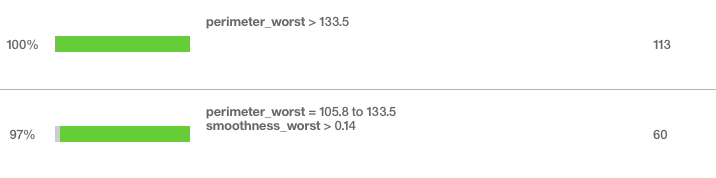
2. Benign: 
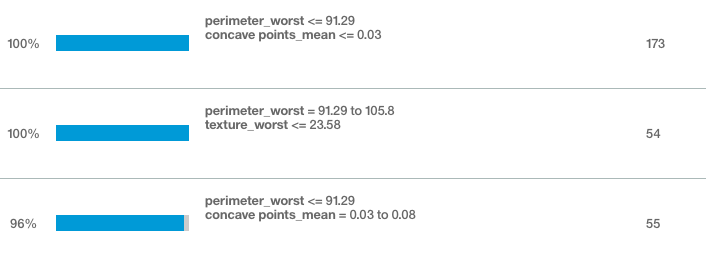
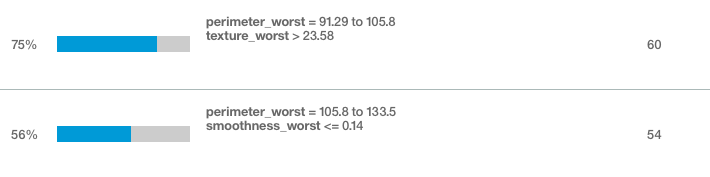

*Due to the high predictive strength of these features, a decision tree is used 
*Even though some features have 100% predictive strength, they are not sufficient to build the decision tree.
For instance, perimeter_worst>133.5 has 100% predictive strength in predicting malignancy, it does not include all tumour cells and some maliganant tumour cells do not have perimeter_worst>133,5

*Feature selection for the decision tree is carried out

Diagnostic strengths of different features:
1. 91% perimeter_worst
2. concave points_mean
3. area_worst
4. 90% concave points_worst
5. 90% radius_worst
6. 88% concavity_mean 
7. 87% perimeter_mean
8. 86% radius_mean
9. 86% area_mean
10. 86% area_se
11. 84% concavity_worst
12. 80% radius_se
13. 80% perimeter_se
14. 79% compactness_mean
15. 78% compactness_worst
16. 73% texture_mean
17. 73% concave points_se
18. 72% texture_worst
19. 72% smoothness_worst
20. 71% symmetry_worst
21. 71% concavity_se
22. 70% fractal_dimentsion_worst
23. 69% compactness_se
24. 67% smoothness_mean
25. 67% symmetry_mean
26. 63% fractal_dimension_mean
27. 63% fractal_dimention_se

Features with diagnostic strength of 60% or above are selected

In [2]:
import pandas as pd
from sklearn import tree

In [3]:
data=pd.read_csv("Feature_selection.csv")

In [4]:
data[data["diagnosis"]=="M"]=1
data[data["diagnosis"]=="B"]=0

In [5]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [6]:
training_data=data.loc[0:398,:] #399 rows
test_data=data.loc[399:,:] #170 rows

In [7]:
classifier=tree.DecisionTreeClassifier().fit(training_data.loc[:,"radius_mean":"fractal_dimension_worst"],
                                             training_data.loc[:,"diagnosis"])

In [15]:
correct=0
incorrect=0
for index,rows in test_data.iterrows(): #iterates through rows in the Dataframe object
    prediction=classifier.predict([rows[1:]])
    if prediction==rows[0]:
        correct=correct+1
    else:
        incorrect=incorrect+1

Accuracy=correct/(correct+incorrect)*100
print("Accuracy=",Accuracy,"%")

Accuracy= 100.0 %


High accuracy (100%) from test_data might be due to:
1. small size of test_data (170 nuclei)
2. high diagnostic strength of features, such as perimeter_worst (91%), concave points_mean (91%), area_worst (90%), concave points_worst (90%), radius_worst (90%)